<a href="https://colab.research.google.com/github/saarthakvyas/Breast_Cancer_Detection/blob/main/Breast_Cancer_Project_P(V2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')

#Packages related to data importing, manipulation, exploratory data analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pandas_profiling
import scipy.stats as stats
import statsmodels.formula.api as smf

#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

#Module related to calculation of metrics
from sklearn import metrics

#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Moudles related to feature selection
from sklearn.feature_selection import RFE, SelectKBest, chi2,f_classif, f_regression

#Modules related to saving python objects permanantly
import joblib

#Dumping model into current directory: joblib.dump(model_xg,"my_model.pkl") 
#Loading model: my_model_loaded=joblib.load("my_model.pkl")

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier, MLPRegressor

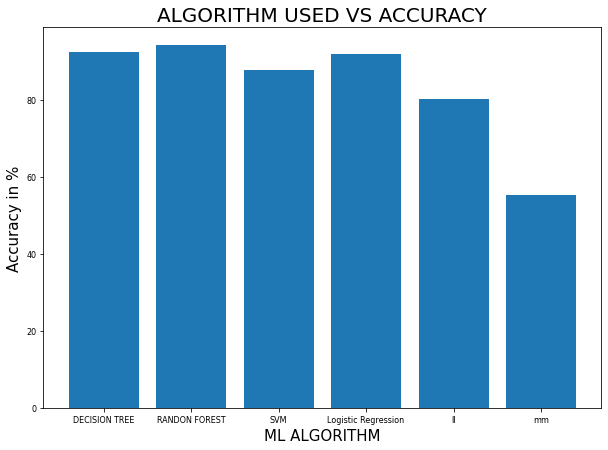

In [222]:
plt.figure(figsize=(10,7))


a= ['DECISION TREE', 'RANDON FOREST', 'SVM', 'Logistic Regression','ll','mm']

b=[92.39,94.15,87.71,91.81,80.22,55.22]
plt.bar(a,b)
plt.title('ALGORITHM USED VS ACCURACY', fontsize=20)

plt.xlabel('ML ALGORITHM', fontsize=15) 
plt.ylabel('Accuracy in %', fontsize=15)
plt.show()

### Importing Packages for building classification models using Machine Learning

#### Load the data

In [106]:
df = pd.read_csv("data.csv")

In [107]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


**Removing The unnecessary Columns**

In [108]:
# df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

**Dimension of DataFrame**

In [109]:
df.shape

(569, 32)

**Checking Target Variable**

In [110]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

**Converting Target Variable in form of 1 and 0 by mapping**

In [111]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

In [112]:
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


## Exploratory Data Analysis

In [113]:
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [221]:
df.dtypes

id                           int64
diagnosis                    int64
texture_mean               float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
texture_se                 float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
symmetry_worst             float64
fractal_dimension_worst    float64
dtype: object

In [115]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [116]:
df.iloc[:,1:31].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826


**Visualizing Heat Map For correlation**

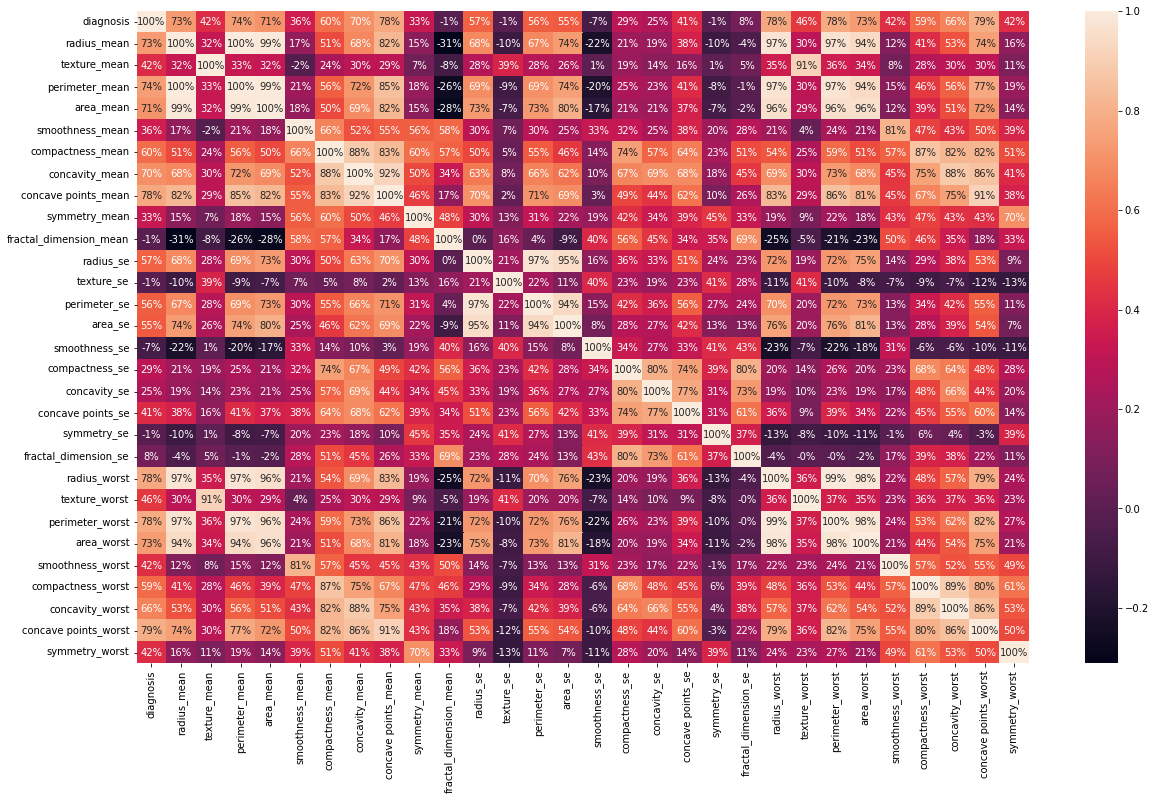

In [117]:
# visualize correlation matrix in Seaborn using a heatmap
figure = plt.figure(figsize=(20,12))
sns.heatmap(df.iloc[:,1:31].corr(), annot = True, fmt = '.0%')

In [118]:
#profile_report = pandas_profiling.ProfileReport(df)

In [119]:
#profile_report.to_file('profile_report.html')

#### As we can see from the profiling report that:-
- area_worst is highly correlated with area_mean (ρ = 0.9592133256)
- concave_points_worst is highly correlated with concave_points_mean (ρ = 0.9101553143)
- concavity_mean is highly correlated with concave_points_mean (ρ = 0.9213910264)
- perimeter_mean is highly correlated with area_worst (ρ = 0.941549808)
- perimeter_se is highly correlated with area_se (ρ = 0.937655407)
- perimeter_worst is highly correlated with perimeter_mean (ρ = 0.970386887)
- radius_mean is highly correlated with perimeter_worst (ρ = 0.965136514)
- radius_se is highly correlated with perimeter_se (ρ = 0.972793677)
- radius_worst is highly correlated with radius_mean (ρ = 0.9695389726)
- texture_worst is highly correlated with texture_mean (ρ = 0.9120445888)

**So we can reject the highly correlated variables in the later stage**

#### Distribution of Target Variable

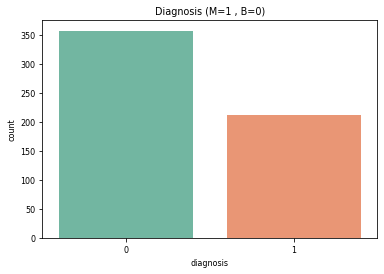

In [225]:
plt.title('Diagnosis (M=1 , B=0)')
sns.countplot(df["diagnosis"],palette="Set2")
plt.show()

In [121]:
features_mean=list(df.columns[1:11])
# split dataframe into two based on diagnosis
dfM=df[df['diagnosis'] ==1]
dfB=df[df['diagnosis'] ==0]

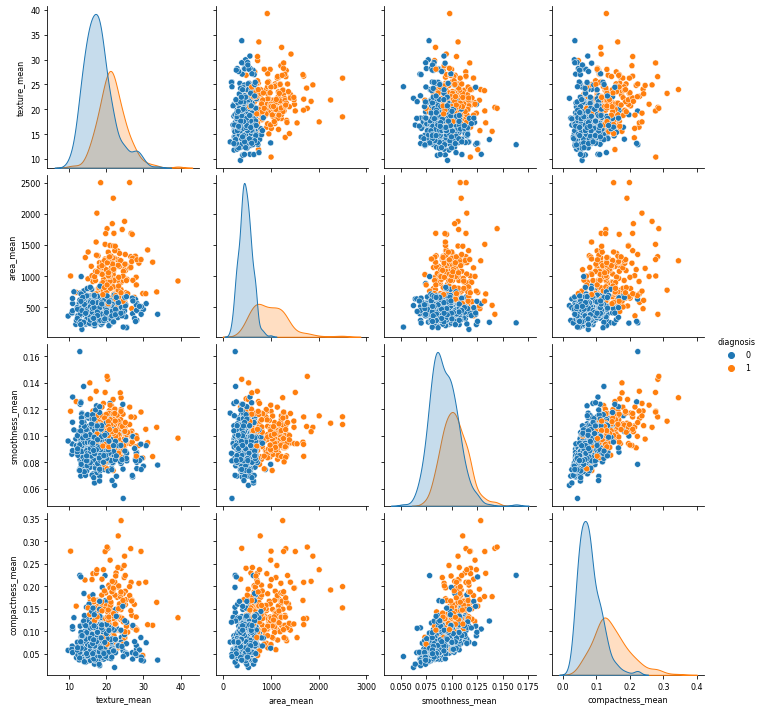

In [224]:
sns.pairplot(df.iloc[:,1:6], hue='diagnosis')

In [ ]:
df.head()

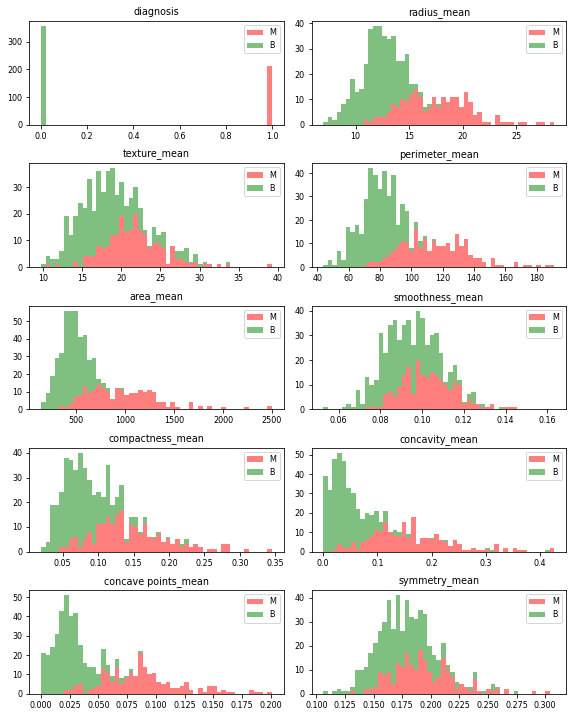

In [123]:
#Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[features_mean[idx]]) - min(df[features_mean[idx]]))/50
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

In [124]:
#Renaming the columsns by replacing special characters with underscore
df.columns = [ i.replace(' ', '_') for i in df.columns]

## Feature Reduction 

**Dropping the highly correated variables**

In [125]:
df.drop(['area_worst','concavity_mean','perimeter_se','perimeter_worst',
        'radius_worst','texture_worst','concave_points_worst','radius_se','perimeter_mean','radius_mean'],axis=1,inplace=True)

In [126]:
df.shape

(569, 22)

### 1) Univariate Regression

In [127]:
somersd_df = pd.DataFrame()
for var in df.columns.difference(['diagnosis']):
    result = smf.logit(formula = str('diagnosis ~ ')+str(var), data=df).fit()
    somers_d = 2*metrics.roc_auc_score(df.diagnosis, result.predict()) - 1
    temp = pd.DataFrame([var,somers_d]).T
    temp.columns = ['VariableName', 'SomersD']
    somersd_df = pd.concat([somersd_df, temp], axis=0)

Optimization terminated successfully.
         Current function value: 0.286166
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.315907
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.447093
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.616674
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.444247
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.227525
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.567669
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.621341
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.384620
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.660234
  

In [128]:
imp_vars_SD = somersd_df.sort_values('SomersD', ascending=False).head(10)

**Important variables through SomersD method**

In [129]:
imp_vars_SD

,VariableName,SomersD
0,concave_points_mean,0.928875
0,area_mean,0.876632
0,area_se,0.852822
0,concavity_worst,0.842728
0,compactness_mean,0.727565
0,compactness_worst,0.724605
0,concave_points_se,0.583584
0,concavity_se,0.561638
0,texture_mean,0.551649
0,smoothness_worst,0.508113


In [130]:
imp_vars_somersD = list(imp_vars_SD.VariableName.values)

### 2) RFE(Recursive Feature Elimination)

In [131]:
X = df[df.columns.difference(['diagnosis'])]
classifier = RandomForestClassifier()
rfe = RFE(classifier)
rfe = rfe.fit(X, df[['diagnosis']] )

In [132]:
imp_vars_RFE = list(X.columns[rfe.support_])

**Important Variables by RFE method**

In [133]:
imp_vars_RFE

['area_mean',
 'area_se',
 'compactness_mean',
 'compactness_se',
 'compactness_worst',
 'concave_points_mean',
 'concavity_worst',
 'smoothness_worst',
 'symmetry_worst',
 'texture_mean']

### 3) Select K Best

In [134]:
X = df[df.columns.difference(['diagnosis'])]
SKB = SelectKBest(f_classif, k=10).fit(X, df[['diagnosis']] )

In [135]:
SKB.get_support()
imp_vars_SKB = list(X.columns[SKB.get_support()])

**Important Variables by Select K best**

In [136]:
imp_vars_SKB

['area_mean',
 'area_se',
 'compactness_mean',
 'compactness_worst',
 'concave_points_mean',
 'concave_points_se',
 'concavity_worst',
 'smoothness_worst',
 'symmetry_worst',
 'texture_mean']

In [137]:
Final_list = list(set(imp_vars_SKB + imp_vars_somersD + imp_vars_RFE))

### Making Final List Of Important Variables

In [138]:
Final_list

['area_se',
 'concavity_se',
 'concave_points_se',
 'concave_points_mean',
 'compactness_worst',
 'texture_mean',
 'area_mean',
 'symmetry_worst',
 'smoothness_worst',
 'compactness_se',
 'concavity_worst',
 'compactness_mean']

# Machine learning

### Splitting the data in train and test for ML algorithms

In [139]:
df.shape

(569, 22)

In [140]:
df.head(2)

,id,diagnosis,texture_mean,area_mean,smoothness_mean,compactness_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,texture_se,...,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,10.38,1001.0,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,...,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,842517,1,17.77,1326.0,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,...,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902


In [141]:
#Independent columns
Ind_cols = df.columns.difference(['diagnosis'])

In [142]:
#Considering Significant Variables for Machine Learning algorithms
train_x, test_x, train_y, test_y = train_test_split(df[Ind_cols],df.diagnosis, test_size=0.3, random_state=1234)

# 1:- Logistic regression using statsmodels(Traditional Approach)

**Splitting the data into train and test**

In [143]:
train, test = train_test_split(df, test_size=0.3, random_state=0)

**Initialising and fitting the model**

In [144]:
logreg = smf.logit(formula='diagnosis~area_se+concavity_worst +concave_points_mean+compactness_worst+concave_points_se+texture_mean+smoothness_worst+compactness_mean+area_mean+symmetry_worst+concavity_se', data=train)

In [145]:
result = logreg.fit()

Optimization terminated successfully.
         Current function value: 0.058178
         Iterations 13


In [146]:
print(result.summary2())

                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.912     
Dependent Variable:    diagnosis          AIC:                70.3095   
Date:                  2022-05-27 04:47   BIC:                118.1469  
No. Observations:      398                Log-Likelihood:     -23.155   
Df Model:              11                 LL-Null:            -263.17   
Df Residuals:          386                LLR p-value:        5.7722e-96
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        13.0000                                          
------------------------------------------------------------------------
                      Coef.   Std.Err.    z    P>|z|    [0.025   0.975] 
------------------------------------------------------------------------
Intercept            -31.9109   8.0240 -3.9770 0.0001  -47.6376 -16.1843
area_se                0.2044   0.0646  3.1641 0.0016    0.0778   0.3310
concavi

### Neglecting the variables with p > 00.5

In [147]:
logreg = smf.logit(formula='diagnosis~area_se+concavity_worst +concave_points_mean+texture_mean+compactness_mean+area_mean+symmetry_worst+concavity_se', data=train)

In [148]:
result = logreg.fit()

print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.061273
         Iterations 12
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.907     
Dependent Variable:    diagnosis          AIC:                66.7736   
Date:                  2022-05-27 04:47   BIC:                102.6517  
No. Observations:      398                Log-Likelihood:     -24.387   
Df Model:              8                  LL-Null:            -263.17   
Df Residuals:          389                LLR p-value:        4.5429e-98
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        12.0000                                          
------------------------------------------------------------------------
                      Coef.   Std.Err.    z    P>|z|    [0.025   0.975] 
------------------------------------------------------------------------
Intercept            -26.4028   6.2606 -4.2173 0.0

#### Accuracy Metrics

In [149]:
train_gini = 2*metrics.roc_auc_score(train['diagnosis'], result.predict(train)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test['diagnosis'], result.predict(test)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

train_auc = metrics.roc_auc_score(train['diagnosis'], result.predict(train))
test_auc = metrics.roc_auc_score(test['diagnosis'], result.predict(test))

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)
                                 

The Gini Index for the model built on the Train Data is :  0.9941780544998786
The Gini Index for the model built on the Test Data is :  0.980893592004703
The AUC for the model built on the Train Data is :  0.9970890272499393
The AUC for the model built on the Test Data is :  0.9904467960023515


In [150]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
train_predicted_prob = pd.DataFrame(result.predict(train))
train_predicted_prob.columns = ['prob']
train_actual = train['diagnosis']
# making a DataFrame with actual and prob columns
train_predict = pd.concat([train_actual, train_predicted_prob], axis=1)
train_predict.columns = ['actual','prob']
train_predict.head()

,actual,prob
478,0,4.908916e-05
303,0,3.561322e-06
155,0,4.527577e-03
186,1,9.993928e-01
101,0,1.550201e-07


In [151]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
test_predicted_prob = pd.DataFrame(result.predict(test))
test_predicted_prob.columns = ['prob']
test_actual = test['diagnosis']
# making a DataFrame with actual and prob columns
test_predict = pd.concat([test_actual, test_predicted_prob], axis=1)
test_predict.columns = ['actual','prob']
test_predict.head()

,actual,prob
512,1,0.999920
457,0,0.013806
439,0,0.000125
298,0,0.005484
37,0,0.000088


In [152]:
train## Intuition behind ROC curve - confusion matrix for each different cut-off shows trade off in sensitivity and specificity
roc_like_df = pd.DataFrame()
train_temp = train_predict.copy()

for cut_off in np.linspace(0,1,50):
    train_temp['cut_off'] = cut_off
    train_temp['predicted'] = train_temp['prob'].apply(lambda x: 0.0 if x < cut_off else 1.0)
    train_temp['tp'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==0 else 0.0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==0 else 0.0, axis=1)
    sensitivity = train_temp['tp'].sum() / (train_temp['tp'].sum() + train_temp['fn'].sum())
    specificity = train_temp['tn'].sum() / (train_temp['tn'].sum() + train_temp['fp'].sum())
    accuracy = (train_temp['tp'].sum()  + train_temp['tn'].sum() ) / (train_temp['tp'].sum() + train_temp['fn'].sum() + train_temp['tn'].sum() + train_temp['fp'].sum())
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity, accuracy]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity', 'accuracy']
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)


In [153]:
roc_like_df.head()

,cutoff,sensitivity,specificity,accuracy
0,0.000000,1.000000,0.000000,0.374372
0,0.020408,1.000000,0.819277,0.886935
0,0.040816,0.993289,0.883534,0.924623
0,0.061224,0.993289,0.899598,0.934673
0,0.081633,0.979866,0.919679,0.942211


In [154]:
## Finding ideal cut-off for checking if this remains same in OOS validation
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']

In [155]:
roc_like_df.head()

,cutoff,sensitivity,specificity,accuracy,total
0,0.000000,1.000000,0.000000,0.374372,1.000000
0,0.020408,1.000000,0.819277,0.886935,1.819277
0,0.040816,0.993289,0.883534,0.924623,1.876823
0,0.061224,0.993289,0.899598,0.934673,1.892887
0,0.081633,0.979866,0.919679,0.942211,1.899544


In [156]:
#Cut-off based on highest sum(sensitivity+specicity)   - common way of identifying cut-off
roc_like_df[roc_like_df['total']==roc_like_df['total'].max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.387755,0.973154,0.983936,0.979899,1.95709
0,0.408163,0.973154,0.983936,0.979899,1.95709
0,0.428571,0.973154,0.983936,0.979899,1.95709
0,0.448980,0.973154,0.983936,0.979899,1.95709


In [157]:
#Choosen Best Cut-off is 0.44 based on highest (sensitivity+specicity)

test_predict['predicted'] = test_predict['prob'].apply(lambda x: 1 if x > 0.44 else 0)
train_predict['predicted'] = train_predict['prob'].apply(lambda x: 1 if x > 0.44 else 0)

In [158]:
train_predict.head()

,actual,prob,predicted
478,0,4.908916e-05,0
303,0,3.561322e-06,0
155,0,4.527577e-03,0
186,1,9.993928e-01,1
101,0,1.550201e-07,0


In [159]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_predict.actual, train_predict.predicted))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_predict.actual, test_predict.predicted))

The overall accuracy score for the Train Data is :  0.9798994974874372
The overall accuracy score for the Test Data  is :  0.9473684210526315


In [160]:
print(metrics.classification_report(train_predict.actual, train_predict.predicted))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       249
           1       0.97      0.97      0.97       149

    accuracy                           0.98       398
   macro avg       0.98      0.98      0.98       398
weighted avg       0.98      0.98      0.98       398



### Performing logistic Regression using K-Fold validation manually

In [161]:
from sklearn.model_selection import cross_val_score, KFold
kfold = KFold(n_splits=10)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = cross_val_score(modelCV, train_x, train_y, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.633


In [162]:
results

array([0.7       , 0.7       , 0.625     , 0.575     , 0.7       ,
       0.6       , 0.525     , 0.6       , 0.51282051, 0.79487179])

# 2:- K-Nearest Neighbors

##### Important Tuning Parameters for KNN: 
- n_neighbors - The number of nearest neighbors K in the K-NN algorithm
- weights - weight function used in predictions.

In [163]:
from sklearn.preprocessing import StandardScaler

In [164]:
#Standardization of data
sc = StandardScaler()
std_data = sc.fit_transform(train_x)

In [165]:
std_data_train = pd.DataFrame(std_data, columns=train_x.columns, index = train_x.index )

In [166]:
std_data_test = pd.DataFrame(sc.transform(test_x), columns=test_x.columns, index = test_x.index )

In [167]:
#Using GridsearchCV with standrardized data
param_grid = {'n_neighbors':[3,4,5,6,7,8,9,10,11,12],
              'weights': ['uniform', 'distance']}
knn = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, cv=5, scoring = 'f1_weighted')
knn.fit(std_data_train, train_y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'weights': ['uniform', 'distance']},
             scoring='f1_weighted')

In [168]:
knn.best_score_

0.9518613831864787

In [169]:
train_pred = knn.predict(std_data_train)
test_pred = knn.predict(std_data_test)

In [170]:
print(metrics.classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       252
           1       1.00      1.00      1.00       146

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398



In [171]:
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       105
           1       0.98      0.82      0.89        66

    accuracy                           0.92       171
   macro avg       0.94      0.90      0.92       171
weighted avg       0.93      0.92      0.92       171



In [172]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_y, train_pred))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_y, test_pred))

The overall accuracy score for the Train Data is :  1.0
The overall accuracy score for the Test Data  is :  0.9239766081871345


# 3:- Decision Trees

##### Important Tuning Parameters for DT: 
- criterion - measure for quality of a split
- max_depth - The maximum depth of the tree.
- max_leaf_nodes - Number of features to consider when looking for the best split
- min_samples_leaf - The minimum number of samples required to be a leaf node. This may have effect of smoothing the model.
- min_sample_split - The minimum number of samples required to split an internal node.

#### Fine Tuning the parameters

In [173]:
param_grid = {'max_depth': np.arange(3, 5),
             'max_features': np.arange(3,5)}

In [174]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
tree.fit( train_x, train_y )

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([3, 4]),
                         'max_features': array([3, 4])})

In [175]:
tree.best_score_

0.909620253164557

In [176]:
tree.best_params_

{'max_depth': 3, 'max_features': 4}

In [177]:
train_pred = tree.predict(train_x)
test_pred = tree.predict(test_x)

In [178]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_y, train_pred))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_y, test_pred))

The overall accuracy score for the Train Data is :  0.9447236180904522
The overall accuracy score for the Test Data  is :  0.8830409356725146


In [179]:
print(metrics.classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       252
           1       0.94      0.91      0.92       146

    accuracy                           0.94       398
   macro avg       0.94      0.94      0.94       398
weighted avg       0.94      0.94      0.94       398



In [180]:
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       105
           1       0.87      0.82      0.84        66

    accuracy                           0.88       171
   macro avg       0.88      0.87      0.88       171
weighted avg       0.88      0.88      0.88       171



# 4:- Bagging

In [181]:
from sklearn.ensemble import BaggingClassifier

**Tuning parameters**

In [182]:
pargrid_ada = {'n_estimators': [50, 60, 70, 80, 90, 100]}

gscv_bagging = GridSearchCV(estimator=BaggingClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [183]:
gscv_results = gscv_bagging.fit(train_x, train_y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [184]:
gscv_results.best_score_

0.9447151898734176

In [185]:
train_pred = gscv_results.predict(train_x)
test_pred = gscv_results.predict(test_x)

In [186]:
print(metrics.classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       252
           1       1.00      1.00      1.00       146

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398



In [187]:
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       105
           1       0.93      0.83      0.88        66

    accuracy                           0.91       171
   macro avg       0.92      0.90      0.91       171
weighted avg       0.91      0.91      0.91       171



# 5:- Random Forest

##### Important Tuning Parameters for Random Forest: 
- criterion - measure for quality of a split
- max_depth - The maximum depth of the tree.
- max_leaf_nodes - Number of features to consider when looking for the best split
- min_samples_leaf - The minimum number of samples required to be a leaf node. This may have effect of smoothing the model.
- min_sample_split - The minimum number of samples required to split an internal node.
- n_estimators - The number of trees in the forest
- max_features - Number of features to consider when looking for the best split

In [188]:
from sklearn.ensemble import RandomForestClassifier

In [189]:
pargrid_ada = {'n_estimators': [50, 60, 70, 80, 90, 100],
                'max_features': [5,6,7,8,9,10,11,12]}
gscv_Rf = GridSearchCV(estimator=RandomForestClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [190]:
gscv_results = gscv_Rf.fit(train_x, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [191]:
gscv_results.best_score_

0.9623101265822784

In [192]:
gscv_results.best_params_

{'max_features': 5, 'n_estimators': 50}

In [193]:
train_pred = gscv_results.predict(train_x)
test_pred = gscv_results.predict(test_x)

In [194]:
print(metrics.classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       252
           1       1.00      1.00      1.00       146

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398



In [195]:
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       105
           1       0.95      0.85      0.90        66

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



# Boosting

# 6:- Ada Boosting

In [196]:
pargrid_ada = {'n_estimators': [100, 200, 400, 600, 800],
               'learning_rate': [10 ** x for x in range(-3, 3)]}

In [197]:
gscv_ada = GridSearchCV(estimator=AdaBoostClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [198]:
gscv_ada.fit(train_x, train_y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100],
                         'n_estimators': [100, 200, 400, 600, 800]},
             verbose=True)

In [199]:
gscv_ada.best_params_

{'learning_rate': 1, 'n_estimators': 800}

In [200]:
gscv_ada.best_score_

0.9823417721518988

In [201]:
ad=AdaBoostClassifier(learning_rate = 1, n_estimators=600)
ad.fit(train_x, train_y )

AdaBoostClassifier(learning_rate=1, n_estimators=600)

In [202]:
train_pred = ad.predict(train_x)
test_pred = ad.predict(test_x)

In [203]:
print(metrics.classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       252
           1       1.00      1.00      1.00       146

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398



In [204]:
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       105
           1       0.98      0.88      0.93        66

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



# 7:- Gradient Boost

##### Important Tuning Parameters for GBM: 
- learning_rate - the effect of each tree on the outcome is shrunk by this factor.
- criterion - measure for quality of a split
- max_depth - The maximum depth of the tree.
- max_leaf_nodes - Number of features to consider when looking for the best split
- min_samples_leaf - The minimum number of samples required to be a leaf node. This may have effect of smoothing the model.
- min_sample_split - The minimum number of samples required to split an internal node.
- n_estimators - The number of trees in the forest
- max_features - Number of features to consider when looking for the best split

In [205]:
gscv_gbm = GridSearchCV(estimator=GradientBoostingClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

gscv_gbm.fit(train_x, train_y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100],
                         'n_estimators': [100, 200, 400, 600, 800]},
             verbose=True)

In [206]:
gscv_gbm.best_params_

{'learning_rate': 1, 'n_estimators': 100}

In [207]:
gscv_gbm.best_score_

0.9597784810126582

In [208]:
gbm=GradientBoostingClassifier(learning_rate = 1, n_estimators=800)
gbm.fit(train_x, train_y )

GradientBoostingClassifier(learning_rate=1, n_estimators=800)

In [209]:
train_pred = gbm.predict(train_x)
test_pred = gbm.predict(test_x)

In [210]:
print(metrics.classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       252
           1       1.00      1.00      1.00       146

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398



In [211]:
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       105
           1       0.97      0.88      0.92        66

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



# 8:- Naive Bayes

In [212]:
nb_clf = GaussianNB()
nb_clf.fit(train_x, train_y)

GaussianNB()

In [213]:
metrics.confusion_matrix( test_y,nb_clf.predict( test_x) )

array([[103,   2],
       [ 64,   2]])

In [214]:
metrics.accuracy_score( test_y, nb_clf.predict( test_x ) )

0.6140350877192983

# 9:-Support Vector Machines (SVC)

##### Important Tuning Parameters for Support Vector Classifier: 
- C - C is the penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly
- class_weight - Weights associated with classes in the form class_label : Weight. If not given, all classes are supposed to have weight one.
- degree - degree is a parameter used when kernel is set to poly. It’s basically the degree of the polynomial used to find the hyperplane to split the data.
- gamma - kernel coefficient for rbf, ploy and sigmoid to handle non-linear classification
- kernel - This selects the type of hyperplane used to separate the data.
- tol - tolerance for stopping criterion.

In [215]:
model = SVC(kernel='rbf', class_weight='balanced')

In [216]:
model.fit(train_x, train_y)

SVC(class_weight='balanced')

In [217]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

grid.fit(train_x, train_y)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]})

In [218]:
print(grid.best_params_)

{'C': 1, 'gamma': 0.0005}


In [219]:
model = grid.best_estimator_
yfit = model.predict(test_x)

In [220]:
from sklearn.metrics import classification_report
print(classification_report(test_y, yfit))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       105
           1       1.00      0.03      0.06        66

    accuracy                           0.63       171
   macro avg       0.81      0.52      0.41       171
weighted avg       0.77      0.63      0.49       171

